# Statistical Significance with Box Plots
In this notebook I follow the tutorial: https://towardsdatascience.com/statsannotations-add-statistical-significance-annotations-on-seaborn-plots-6b753346a42a <br>
And apply it on network centrality measures.<br><br>
This notebook uses the lib 'statannotations' (pip install statannotations)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator
from itertools import combinations
import numpy as np
import pandas as pd

## Create 4 networks: 1 scale free | 3 random
Two of the random networks have clustering

In [2]:
G1=nx.barabasi_albert_graph(100,3)
G2=nx.erdos_renyi_graph(100,0.06)
G3=nx.watts_strogatz_graph(100,6,0.3)
G4=nx.watts_strogatz_graph(100,6,0.1)
G1.name='BarabaseAlbert'
G2.name='ErdosRenyi'
G3.name='WattsStrogatz_1'
G4.name='WattsStrogatz_2'
networks=[G1,G2,G3,G4]

### Overview
##### All networks have roughly the same number of nodes and edges. Thus, the same average degree.
##### However, each network has significantly different clustering and degree distribution.

In [3]:
for G in networks:
    print(nx.info(G))
    print('Average Clustering: '+str(round(np.mean(sorted(dict(nx.clustering(G)).values())),3)),end='\n\n')

Name: BarabaseAlbert
Type: Graph
Number of nodes: 100
Number of edges: 291
Average degree:   5.8200
Average Clustering: 0.122

Name: ErdosRenyi
Type: Graph
Number of nodes: 100
Number of edges: 274
Average degree:   5.4800
Average Clustering: 0.055

Name: WattsStrogatz_1
Type: Graph
Number of nodes: 100
Number of edges: 300
Average degree:   6.0000
Average Clustering: 0.154

Name: WattsStrogatz_2
Type: Graph
Number of nodes: 100
Number of edges: 300
Average degree:   6.0000
Average Clustering: 0.432



### Measures Distribution

In [4]:
degrees={}
clustering={}
for G in networks:
    degrees[G.name]=list(dict(G.degree).values())
    clustering[G.name]=list(dict(nx.clustering(G)).values())

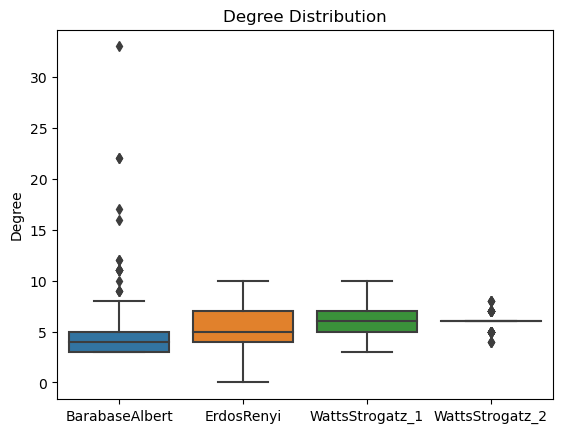

In [5]:
sns.boxplot(data=pd.DataFrame(degrees))
plt.ylabel('Degree')
plt.title('Degree Distribution')
plt.show()

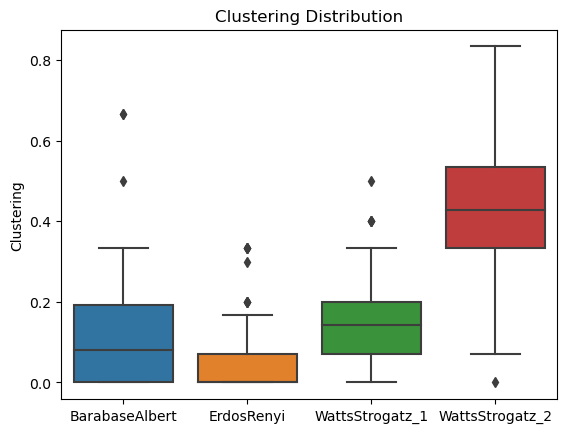

In [6]:
sns.boxplot(data=pd.DataFrame(clustering))
plt.ylabel('Clustering')
plt.title('Clustering Distribution')
plt.show()

### Adding P-Value

In [7]:
pairs = list(combinations([G.name for G in networks], r=2))

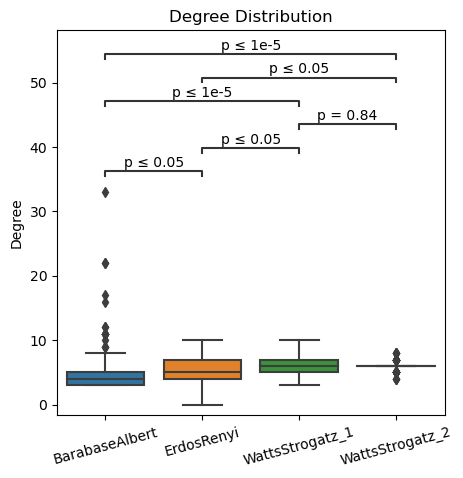

In [8]:
df=pd.DataFrame(degrees)
plt.figure(figsize=(5,5))
ax = sns.boxplot(data=df)

annotator = Annotator(ax, pairs, data=df,verbose=False)
annotator.configure(test="Mann-Whitney",text_format="simple",show_test_name=False)
annotator.apply_and_annotate()

plt.ylabel('Degree')
plt.title('Degree Distribution')
plt.xticks(rotation=15)
plt.show()

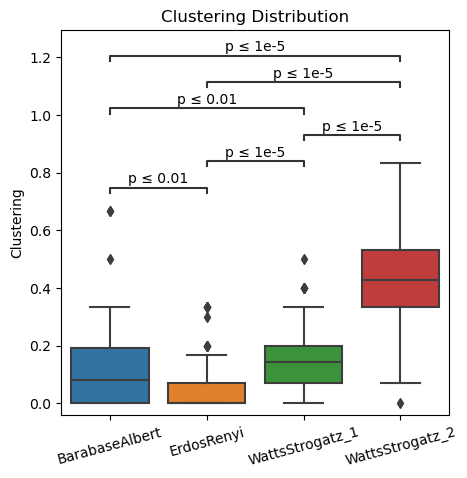

In [9]:
df=pd.DataFrame(clustering)
plt.figure(figsize=(5,5))
ax = sns.boxplot(data=df)

annotator = Annotator(ax, pairs, data=df,verbose=False)
annotator.configure(test="Mann-Whitney",text_format="simple",show_test_name=False)
annotator.apply_and_annotate()

plt.ylabel('Clustering')
plt.title('Clustering Distribution')
plt.xticks(rotation=15)
plt.show()